In [128]:
import pandas as pd
import numpy as np
import math

In [129]:
time_series = pd.read_csv("time_series_attendance.csv")

In [130]:
time_series.head(1)

,month,attendance,month_id,region_Japan,region_China,region_Korea,region_South Asia,region_The Himalayas and the Tibetan Buddhist World,region_None,region_Southeast Asia,...,Market Budget Flag_Medium,Market Budget Flag_High,Construction Period Flag_1.0,Construction Period Flag_0.0,size_missing_0,size_missing_1,duration_avg,size_avg,exclusivity_sum,story_sum
0,11/1/2012,11634,1,1,1,0,2,0,0,0,...,0,0,0,4,3,1,276.5,10.75,1,2


In [131]:
time_series.describe()

,attendance,month_id,region_Japan,region_China,region_Korea,region_South Asia,region_The Himalayas and the Tibetan Buddhist World,region_None,region_Southeast Asia,region_The Persian World and West Asia,...,Market Budget Flag_Medium,Market Budget Flag_High,Construction Period Flag_1.0,Construction Period Flag_0.0,size_missing_0,size_missing_1,duration_avg,size_avg,exclusivity_sum,story_sum
count,80.000000,80.0000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000,80.00000,80.000000,...,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,17768.525000,40.5000,1.250000,1.312500,0.712500,1.337500,0.375000,0.40000,0.23750,0.075000,...,0.375000,0.462500,1.550000,4.275000,4.037500,1.787500,184.518379,27.403607,1.862500,2.525000
std,11522.427083,23.2379,1.195985,1.120508,0.659761,0.980103,0.559724,0.56479,0.45684,0.265053,...,0.536633,0.673997,1.358517,2.959537,2.089417,1.154997,42.403449,18.869364,1.122201,1.550623
min,7255.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,81.333333,1.000000,0.000000,0.000000
25%,11862.750000,20.7500,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,1.750000,2.000000,1.000000,152.414773,13.250000,1.000000,1.000000
50%,14502.000000,40.5000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.00000,0.000000,...,0.000000,0.000000,2.000000,5.000000,4.000000,2.000000,183.873016,22.866667,2.000000,2.000000
75%,18773.500000,60.2500,2.000000,2.000000,1.000000,2.000000,1.000000,1.00000,0.00000,0.000000,...,1.000000,1.000000,2.000000,6.000000,5.250000,3.000000,213.339286,40.035714,3.000000,4.000000
max,81023.000000,80.0000,5.000000,4.000000,3.000000,4.000000,2.000000,2.00000,2.00000,1.000000,...,2.000000,3.000000,6.000000,11.000000,11.000000,4.000000,311.000000,111.500000,4.000000,6.000000


In [132]:
time_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 48 columns):
month                                                  80 non-null object
attendance                                             80 non-null int64
month_id                                               80 non-null int64
region_Japan                                           80 non-null int64
region_China                                           80 non-null int64
region_Korea                                           80 non-null int64
region_South Asia                                      80 non-null int64
region_The Himalayas and the Tibetan Buddhist World    80 non-null int64
region_None                                            80 non-null int64
region_Southeast Asia                                  80 non-null int64
region_The Persian World and West Asia                 80 non-null int64
region_Entire Asia                                     80 non-null int64
country_Japanese    

### Scale the duration & size column to 0-10

In [133]:
def scale_column(column):
    length = len(column)
    min_value = column.min()
    max_value = column.max()
    for i in range(length):
        column[i]= (column[i]  - min_value)/(max_value - min_value)
    return column

In [134]:
time_series["duration_avg"] = scale_column(time_series["duration_avg"])

/Users/lush/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [135]:
time_series["size_avg"] = scale_column(time_series["size_avg"])

/Users/lush/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Regression model

In [136]:
from sklearn.linear_model import LinearRegression

In [137]:
x_columns = [i for i in time_series.columns if i not in ["attendance","month","month_id"]]

In [138]:
time_series_x = time_series[x_columns]
time_series_y = time_series["attendance"]

In [139]:
def log_transformation(x):
    x = math.log(x,10)
    return x

In [141]:
time_series_y = time_series_y.apply(log_transformation)

In [142]:
type(time_series_y)

pandas.core.series.Series

In [143]:
train_x = time_series_x.iloc[0:50,]
train_y = pd.DataFrame(time_series_y).iloc[0:50,]
test_x = time_series_x.iloc[50:81,]
test_y = pd.DataFrame(time_series_y).iloc[50:81,]

In [144]:
regression_model = LinearRegression()
regression_model.fit(train_x,train_y)
regression_predict = regression_model.predict(test_x)
regression_model.score(test_x,test_y)


-17.55042767219059

In [164]:
regression_model.coef_

array([[ 0.02124683,  0.02441737,  0.07578194,  0.01665572, -0.10346094,
         0.17125647, -0.11625876, -0.0688607 , -0.05235991,  0.02124683,
         0.02441737,  0.07578194,  0.03659001,  0.24959844,  0.00769   ,
         0.04364736, -0.04755858, -0.16186862,  0.10514106, -0.05235991,
        -0.17400176, -0.15990612,  0.06819512,  0.17853793,  0.02762429,
        -0.10180763, -0.07219666, -0.04755858, -0.08437643,  0.0101336 ,
         0.0013448 ,  0.11157485, -0.09511716, -0.05951807, -0.05181477,
        -0.07184189,  0.09207468,  0.02022022, -0.05180219, -0.10405492,
         0.07247295, -0.9185333 , -1.068354  , -0.18395516,  0.05057316]])

In [145]:
def reverse_log_transformation(x):
    x = 10**x
    return x

In [146]:
regression_predict = pd.DataFrame(regression_predict).apply(reverse_log_transformation)
test_y = test_y.apply(reverse_log_transformation)

In [156]:
(abs(regression_predict.values-test_y.values)/test_y.values).mean()

0.653409384220602

In [161]:
import matplotlib.pyplot as plt


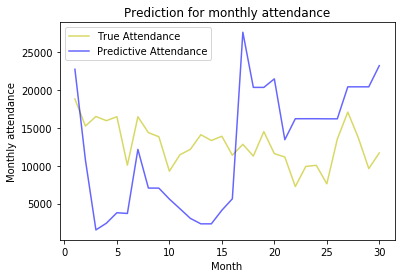

In [163]:
x_position = np.linspace(1,30,30)
plt.plot(x_position,test_y,color='y',alpha = 0.6,label='True Attendance')
plt.plot(x_position,regression_predict.values,color='b',alpha = 0.6,label='Predictive Attendance')
plt.xlabel('Month')
plt.ylabel('Monthly attendance')
plt.title('Prediction for monthly attendance')
plt.legend(loc='upper left')
